## Setup

In [26]:
import numpy as np
from skimage.io import imread, imsave
from skimage.data import cells3d
from skimage.filters import gaussian
from scipy.ndimage import convolve
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt
from skimage import img_as_float
import imageio.v2 as iio
import tifffile as tiff
from PIL import Image
import os

---
## Test Image

In [4]:
imageTest = img_as_float(iio.imread("simple_3d_ball.tif"))

(-0.5, 63.5, 63.5, -0.5)

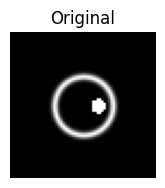

In [5]:
plt.subplot(1, 3, 1)
plt.imshow(imageTest[32], cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

In [6]:
psfTest = img_as_float(iio.imread("simple_3d_psf.tif"))

In [7]:
img_n = img_as_float(iio.imread("simple_3d_ball_blurred.tif"))

Sin regularizador

(-0.5, 63.5, 63.5, -0.5)

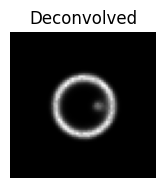

In [8]:
number_of_iterations = 30
deconvolvedTest = richardson_lucy_deconvolution(img_n, psfTest, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolvedTest[32], cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [9]:
%timeit -n 1 -r 10  richardson_lucy_deconvolution(img_n, psfTest, number_of_iterations)

16 s ± 40.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


---
## Cells 3D

In [4]:
image = img_as_float(iio.imread("cells3d.tif"))[:,1,119:190,79:150]
# imshow(image)

(-0.5, 70.5, 70.5, -0.5)

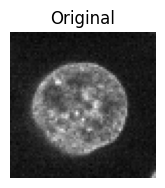

In [5]:
plt.subplot(1, 3, 1)
plt.imshow(image[30], cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 70.5, 70.5, -0.5)

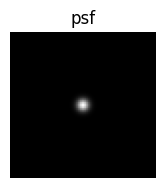

In [6]:
perfect_psf = np.zeros( (61,71,71) )
perfect_psf[31,35,35] = 1
psf = gaussian(perfect_psf, sigma=2)

plt.subplot(1, 3, 1)
plt.imshow(psf[31], cmap='gray')
plt.title('psf')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 70.5, 70.5, -0.5)

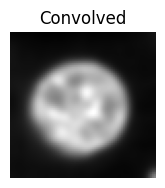

In [7]:
convolved = convolve(image, psf)

plt.subplot(1, 3, 1)
plt.imshow(convolved[30], cmap='gray')
plt.title('Convolved')
plt.axis('off') 

In [8]:
convolved.shape

(60, 71, 71)

(-0.5, 70.5, 70.5, -0.5)

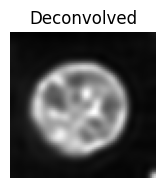

In [7]:
number_of_iterations = 30
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved[30], cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [8]:
%timeit -n 1 -r 10  richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

9.96 s ± 18.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


---
## Cube of Spherical Beads

In [34]:
# Cargamos la imagen
cubeImg = img_as_float(iio.imread("ref.tif"))

# Cargamos la PSF

cubePSF = img_as_float(iio.imread("PSF.tif"))[48:80,48:80,48:80]

print(cubeImg.shape)
print(cubePSF.shape)

(128, 128, 128)
(32, 32, 32)


(-0.5, 127.5, 127.5, -0.5)

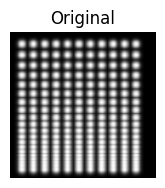

In [35]:
plt.subplot(1, 3, 1)
plt.imshow(cubeImg[30], cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 127.5, 127.5, -0.5)

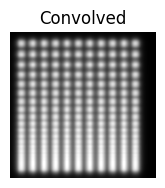

In [36]:
cubeConvolved = convolve(cubeImg, cubePSF)

tiff.imwrite('cubeConvolved.tif', cubeConvolved.astype('float32'))


plt.subplot(1, 3, 1)
plt.imshow(cubeConvolved[30], cmap='gray')
plt.title('Convolved')
plt.axis('off') 

(-0.5, 127.5, 127.5, -0.5)

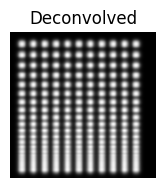

In [7]:
number_of_iterations = 30
deconvolved = richardson_lucy_deconvolution(cubeConvolved, cubePSF, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved[30], cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [8]:
%timeit -n 1 -r 10  richardson_lucy_deconvolution(cubeConvolved, cubePSF, number_of_iterations)

23.3 s ± 170 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


---
## C. elegans embryo

In [27]:
import os

def load_image_stack(folder_path):
    # Listar todos los archivos en la carpeta y ordenar
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.png') or f.endswith('.jpg')])

    # Leer la primera imagen para obtener las dimensiones
    first_image = iio.imread(os.path.join(folder_path, files[0]))
    height, width = first_image.shape

    # Crear una matriz 3D vacía para almacenar las imágenes
    image_stack = np.zeros((len(files), height, width), dtype=first_image.dtype)

    # Cargar cada imagen en la matriz 3D
    for i, file in enumerate(files):
        image_stack[i, :, :] = iio.imread(os.path.join(folder_path, file))

    return image_stack

## Canal 1

In [28]:
# Ruta a la carpeta que contiene las imágenes Z-stack
imagePath = '/Users/yi/TFGNotebook/CElegans-CY3'
psfPath = '/Users/yi/TFGNotebook/PSF-CElegans-CY3'

# Cargar las imágenes en una matriz 3D
image_stack = load_image_stack(imagePath)[:,0:356,0:336]
psf_stack = load_image_stack(psfPath)[:, 178:534, 168:504] #mitad +152

# Verificar las dimensiones de las matrices 3D
print(image_stack.shape)
print(psf_stack.shape)

(104, 356, 336)
(104, 356, 336)


(-0.5, 335.5, 355.5, -0.5)

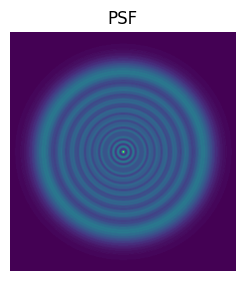

In [29]:
plt.subplot(1, 2, 2)
plt.imshow(psf_stack[1])
plt.title('PSF')
plt.axis('off')

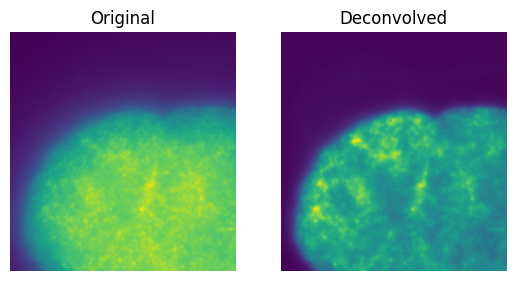

In [30]:
#deconvolved_stack = np.zeros_like(image_stack)
num_iterations = 50  # Número de iteraciones para el algoritmo de Richardson-Lucy

deconvolved_stack = richardson_lucy_deconvolution(image_stack, psf_stack, num_iterations)

# Reproducir un sonido en macOS
os.system('say "COMPLETADO"')

# Visualizar un plano específico de la imagen deconvolucionada
plt.subplot(1, 2, 1)
plt.imshow(image_stack[52])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deconvolved_stack[52])
plt.title('Deconvolved')
plt.axis('off')

plt.show()



En Julia, la función save de la biblioteca ImageMagick.jl es muy similar a Pillow, ya que ambas son versátiles para guardar imágenes en varios formatos y ajustan automáticamente el tipo de datos. Pillow sería el más similar al método save de Julia en términos de funcionalidad y flexibilidad de formato.

In [10]:
# Extraer el stack 52
stack_52 = deconvolved_stack[52]

# Si stack_52 tiene valores entre 0 y 1, conviértelo a escala de 0 a 255
stack_52= (stack_52 - np.min(stack_52)) / (np.max(stack_52) - np.min(stack_52))  # Normalizar a [0, 1]
stack_52 = (stack_52 * 255).astype(np.uint8)

# Crear la imagen PIL desde el array y guardar en formato PNG
imagen = Image.fromarray(stack_52)
imagen.save('PythonITK_CANAL1Mejorada150.png')


In [15]:
%timeit -n 1 -r 1  richardson_lucy_deconvolution(image_stack, psf_stack, 50)

6min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Canal 2

In [19]:
# Ruta a la carpeta que contiene las imágenes Z-stack
imagePath2 = '/Users/yi/TFGNotebook/CElegans-DAPI'
psfPath2 = '/Users/yi/TFGNotebook/PSF-CElegans-DAPI'

# Cargar las imágenes en una matriz 3D
image_stack2 = load_image_stack(imagePath2)[:,0:356,0:336]
psf_stack2 = load_image_stack(psfPath2)[:, 178:534, 168:504] #mitad +152

# Verificar las dimensiones de las matrices 3D
print(image_stack2.shape)
print(psf_stack2.shape)

(104, 356, 336)
(104, 356, 336)


(-0.5, 335.5, 355.5, -0.5)

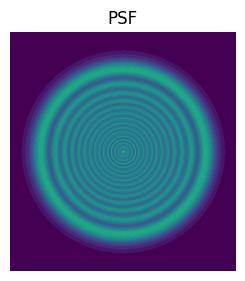

In [20]:
plt.subplot(1, 2, 2)
plt.imshow(psf_stack2[1])
plt.title('PSF')
plt.axis('off')

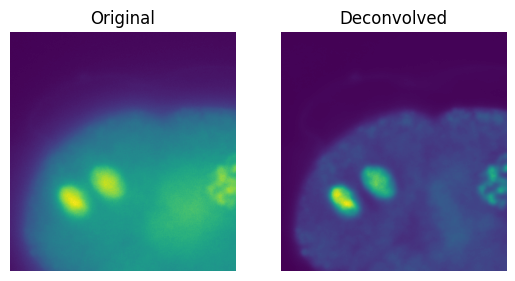

In [21]:
#deconvolved_stack2 = np.zeros_like(image_stack2)
num_iterations = 150  # Número de iteraciones para el algoritmo de Richardson-Lucy

deconvolved_stack2 = richardson_lucy_deconvolution(image_stack2, psf_stack2, num_iterations)

# Reproducir un sonido en macOS
# os.system('say "cocacola"')

# Visualizar un plano específico de la imagen deconvolucionada
plt.subplot(1, 2, 1)
plt.imshow(image_stack2[52])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deconvolved_stack2[52])
plt.title('Deconvolved')
plt.axis('off')

plt.show()

In [7]:
# Extraer el stack 52
stack_522 = deconvolved_stack2[52]

# Si stack_52 tiene valores entre 0 y 1, conviértelo a escala de 0 a 255
stack_522= (stack_522 - np.min(stack_522)) / (np.max(stack_522) - np.min(stack_522))  # Normalizar a [0, 1]
stack_522 = (stack_522 * 255).astype(np.uint8)

# Crear la imagen PIL desde el array y guardar en formato PNG
imagen2 = Image.fromarray(stack_522)
imagen2.save('PythonITK_CANAL2Mejorada100.png')


In [8]:
%timeit -n 1 -r 1  richardson_lucy_deconvolution(image_stack2, psf_stack2, 20)

3min ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Canal 3

In [22]:
# Ruta a la carpeta que contiene las imágenes Z-stack
imagePath3 = '/Users/yi/TFGNotebook/CElegans-FITC'
psfPath3 = '/Users/yi/TFGNotebook/PSF-CElegans-FITC'

# Cargar las imágenes en una matriz 3D
image_stack3 = load_image_stack(imagePath3)[:,0:356,0:336]
psf_stack3 = load_image_stack(psfPath3)[:, 178:534, 168:504] #mitad +152

# Verificar las dimensiones de las matrices 3D
print(image_stack3.shape)
print(psf_stack3.shape)

(104, 356, 336)
(104, 356, 336)


(-0.5, 335.5, 355.5, -0.5)

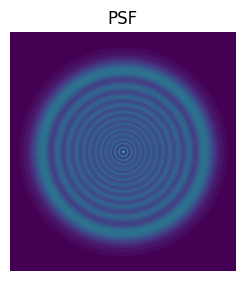

In [23]:
plt.subplot(1, 2, 2)
plt.imshow(psf_stack3[1])
plt.title('PSF')
plt.axis('off')

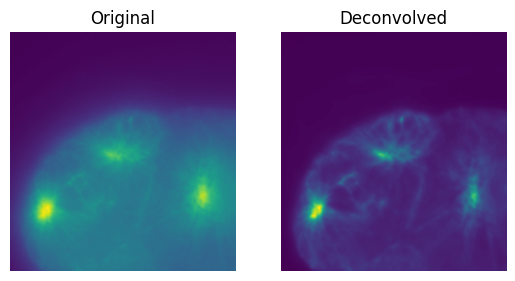

In [24]:
#deconvolved_stack3 = np.zeros_like(image_stack3)

num_iterations = 150  # Número de iteraciones para el algoritmo de Richardson-Lucy

deconvolved_stack3 = richardson_lucy_deconvolution(image_stack3, psf_stack3, num_iterations)


# Reproducir un sonido en macOS
os.system('say "YEAH"')

# Visualizar un plano específico de la imagen deconvolucionada
plt.subplot(1, 2, 1)
plt.imshow(image_stack3[52])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deconvolved_stack3[52])
plt.title('Deconvolved')
plt.axis('off')

plt.show()

In [15]:
# Extraer el stack 52
stack_523 = deconvolved_stack3[52]

# Si stack_52 tiene valores entre 0 y 1, conviértelo a escala de 0 a 255
stack_523= (stack_523 - np.min(stack_523)) / (np.max(stack_523) - np.min(stack_523))  # Normalizar a [0, 1]
stack_523 = (stack_523 * 255).astype(np.uint8)

# Crear la imagen PIL desde el array y guardar en formato PNG
imagen3 = Image.fromarray(stack_523)
imagen3.save('PythonITK_CANAL3Mejorada100.png')

In [28]:
%timeit -n 1 -r 1  richardson_lucy_deconvolution(image_stack3, psf_stack3, 50)

6min 59s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Combinación de canales

(-0.5, 335.5, 355.5, -0.5)

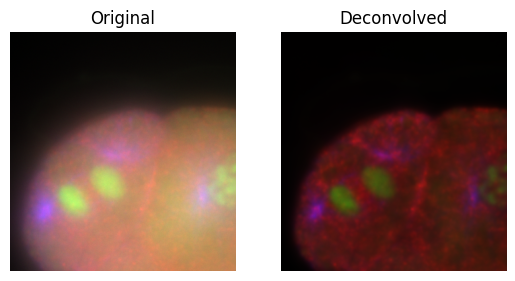

In [25]:
# Normalizar los canales (opcional, pero recomendado)
def normalize(image):
    min_val = np.min(image)
    max_val = np.max(image)
    if min_val == max_val:
        return np.zeros_like(image)  # O np.ones_like(image), dependiendo de tu preferencia
    return (image - min_val) / (max_val - min_val)
deconvolved_stack_R = normalize(deconvolved_stack)
deconvolved_stack_G = normalize(deconvolved_stack2)
deconvolved_stack_B = normalize(deconvolved_stack3)

# Combinar los tres canales en una sola matriz 4D (profundidad, altura, ancho, canales)
deconvolved_stack_color = np.stack((deconvolved_stack_R, deconvolved_stack_G, deconvolved_stack_B), axis=-1)

# Guardar las imágenes en formato PNG
iio.imwrite('imagenDeconvolucionada_100150150_PythonMejora.png', (deconvolved_stack_color[52] * 255).astype(np.uint8))


# Visualizar un plano específico de la imagen deconvolucionada en color
plt.subplot(1, 2, 1)
plt.imshow(np.stack((normalize(image_stack[52]), normalize(image_stack2[52]), normalize(image_stack3[52])), axis=-1))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deconvolved_stack_color[52])
plt.title('Deconvolved')
plt.axis('off')
